In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
%matplotlib inline
import sklearn

In [ ]:
heart = pd.read_csv('/content/heart failur classification dataset.csv')

In [ ]:
heart= heart.assign(target = lambda x : 0)

In [ ]:
heart.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,target
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1,0
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1,0
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1,0
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1,0
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
heart['sex'] = enc.fit_transform(heart['sex'])

# Compare the two columns
print(heart[['sex']].head())

   sex
0    1
1    1
2    1
3    1
4    0


In [ ]:
heart_subset = heart[heart['time'].notnull()]

# Print out the shape of the subset
print("Shape after removing null values: ", heart_subset.shape)
print("Shape of dataframe before dropping:", heart.shape)
heart = heart.dropna(axis = 0, subset = ['time'])
print("Shape after dropping:", heart.shape)

Shape after removing null values:  (292, 15)
Shape of dataframe before dropping: (299, 15)
Shape after dropping: (292, 15)


In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heart[['serum_sodium']])

heart['serum_sodium'] = impute.transform(heart[['serum_sodium']])

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 297
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                292 non-null    int64  
 1   age                       292 non-null    float64
 2   anaemia                   292 non-null    int64  
 3   creatinine_phosphokinase  292 non-null    int64  
 4   diabetes                  292 non-null    int64  
 5   ejection_fraction         292 non-null    int64  
 6   high_blood_pressure       292 non-null    int64  
 7   platelets                 292 non-null    float64
 8   serum_creatinine          292 non-null    float64
 9   serum_sodium              292 non-null    float64
 10  sex                       292 non-null    int64  
 11  smoking                   292 non-null    object 
 12  time                      292 non-null    float64
 13  DEATH_EVENT               292 non-null    int64  
 14  target    

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
heart['smoking'] = enc.fit_transform(heart['smoking'])

# Compare the two columns
print(heart[['smoking']].head())

   smoking
0        0
1        0
2        1
3        0
4        0


In [ ]:
print(heart.isnull().sum())

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
target                      0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

heart['high_blood_pressure'] = enc.fit_transform(heart['high_blood_pressure'])

print(heart['high_blood_pressure'])

0      1
1      0
2      0
3      0
4      0
      ..
293    0
294    1
295    0
296    0
297    0
Name: high_blood_pressure, Length: 292, dtype: int64


In [ ]:
heart = heart.drop(['Unnamed: 0'], axis = 1)
heart.shape

(292, 14)

In [ ]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,target
0,75.0,0,582,0,20,1,265000.00,1.9,136.685315,1,0,4.0,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,1,0,6.0,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,1,1,7.0,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,1,0,7.0,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,0,0,8.0,1,0


In [ ]:
X = heart.drop('high_blood_pressure', axis = 1)
y = heart['high_blood_pressure']

In [ ]:
#Split the data into 80% training and 20% testing
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [ ]:
LR = LogisticRegression().fit(X_train,y_train)

In [ ]:
#Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train) #Training the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:

print( model.score(X_train, y_train))
score_1 = accuracy_score(y_test, predictions)
print (score_1)

0.6372549019607843
0.6477272727272727


In [ ]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2652
X_test- 1144
y_train- 204
y_test- 88


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
predictions=model1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78        58
           1       0.33      0.03      0.06        30

    accuracy                           0.65        88
   macro avg       0.50      0.50      0.42        88
weighted avg       0.55      0.65      0.54        88



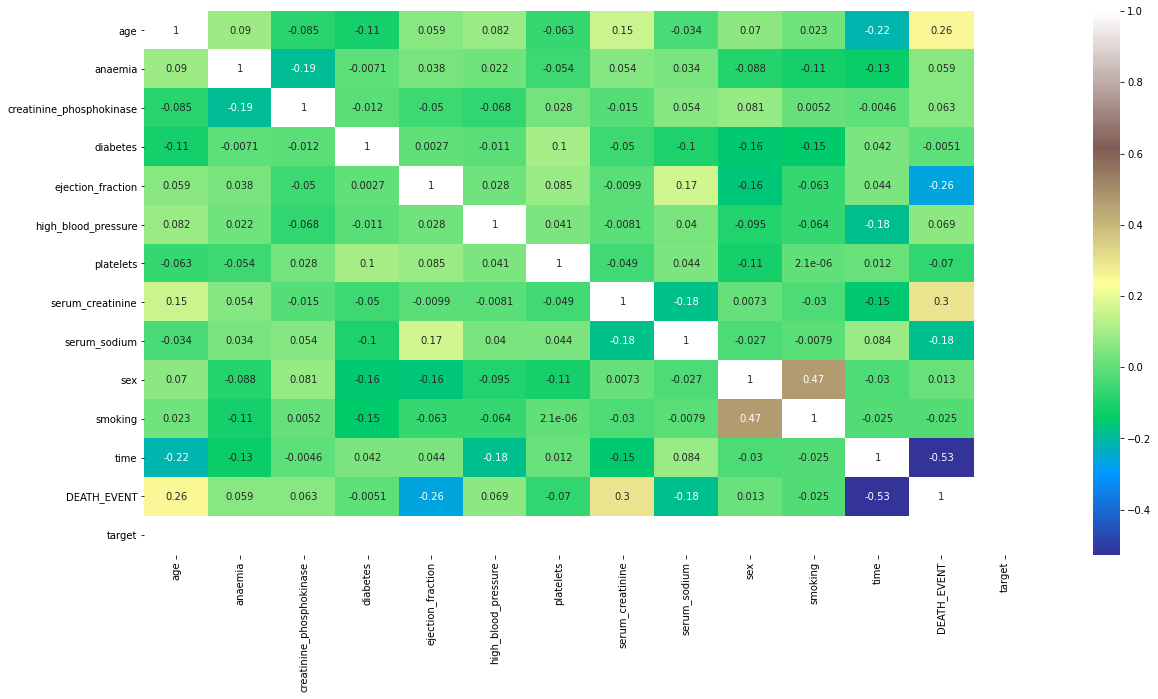

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(heart.corr(), annot=True, cmap='terrain')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
X = heart.iloc[:,1:12]
y = heart.iloc[:,12]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.864406779661017


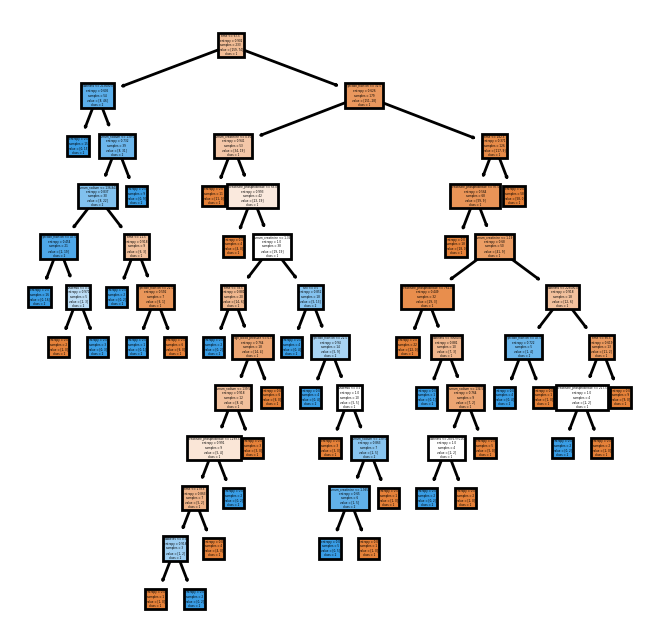

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=['1','2'],
               filled = True);

                               age   anaemia  ...  DEATH_EVENT  target
age                       1.000000  0.090419  ...     0.257126     NaN
anaemia                   0.090419  1.000000  ...     0.059136     NaN
creatinine_phosphokinase -0.084603 -0.187515  ...     0.063287     NaN
diabetes                 -0.110183 -0.007090  ...    -0.005065     NaN
ejection_fraction         0.058501  0.037690  ...    -0.263698     NaN
high_blood_pressure       0.082202  0.022499  ...     0.068684     NaN
platelets                -0.063488 -0.054290  ...    -0.070449     NaN
serum_creatinine          0.153511  0.053571  ...     0.296866     NaN
serum_sodium             -0.033761  0.034118  ...    -0.182195     NaN
sex                       0.069737 -0.088416  ...     0.012756     NaN
smoking                   0.022816 -0.111909  ...    -0.024754     NaN
time                     -0.216149 -0.132538  ...    -0.526475     NaN
DEATH_EVENT               0.257126  0.059136  ...     1.000000     NaN
target

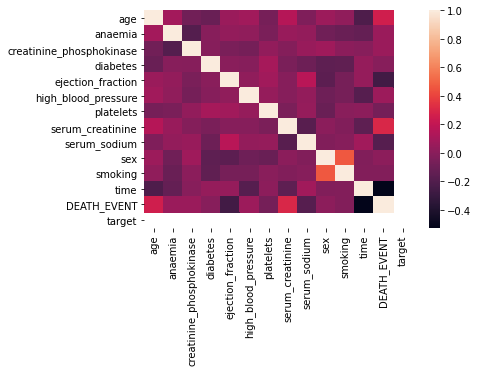

In [ ]:
import seaborn as sns
co = heart.corr() 
print(co)
sns.heatmap(co)

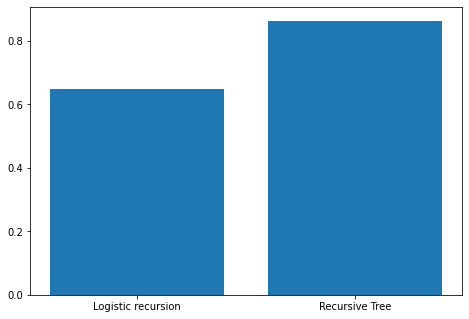

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

width = 0.55
ax = fig.add_axes([0,0,1,1])
label = ['Logistic recursion', 'Recursive Tree']
percentage = [score_1, score]
ax.bar(label, percentage)

plt.show()

In [ ]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.0)


In [ ]:
!python -m pip show scikit-learn 

Name: scikit-learn
Version: 0.24.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, numpy, threadpoolctl, joblib
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [ ]:
heart.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'target'],
      dtype='object')

In [ ]:
heart["class"]=heart["DEATH_EVENT"]

In [ ]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,target,class
0,75.0,0,582,0,20,1,265000.00,1.9,136.685315,1,0,4.0,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,1,0,6.0,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,1,1,7.0,1,0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,1,0,7.0,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,0,0,8.0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efeaed405f8>,
      dtype=object)

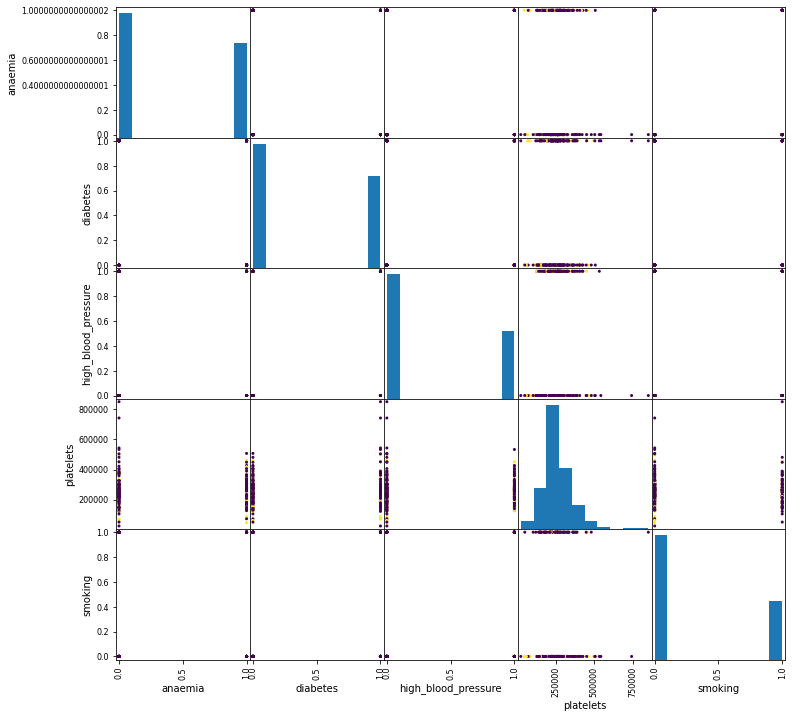

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(heart[['anaemia', 'diabetes',  'high_blood_pressure', 'platelets','smoking']], c=heart["class"] , figsize=(12,12), alpha=1)

In [ ]:
# X label data
X = heart.drop("high_blood_pressure", axis=1)
y= heart["high_blood_pressure"]

In [ ]:
#Lets split the data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [ ]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Training set: x->(204, 14) , y->(204,) 
 Testing set: x->(88, 14) , y->(88,)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=10   )
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
preSVM=accuracy_score(y_pred,y_test)
preSVMTrain=svc.score(X_train, y_train)
preSVMTest=svc.score(X_test , y_test)
print("Training accuracy" , preSVMTrain)
print("Testing accuracy" , preSVMTest)
print(preSVM)

Training accuracy 0.6008583690987125
Testing accuracy 0.6440677966101694
0.6440677966101694


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
#gnb.fit(X_train, y_train)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(X_test, y_test)))

Training accuracy of the model is 0.63
Testing accuracy of the model is 0.58


In [ ]:
predictions = gnb.predict(X_test)
print(predictions)

[0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 1 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[56 29]
 [ 2  1]]


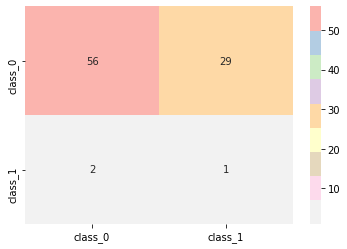

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r",xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(X_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(X_test, y_test)))

Training accuracy of the model is 0.63
Testing accuracy of the model is 0.68


In [ ]:
predictions = svc.predict(X_test)
print(predictions)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[53 23]
 [ 5  7]]


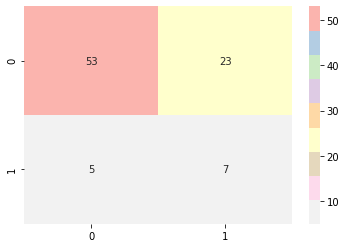

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(X_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.68


In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[51 21]
 [ 7  9]]


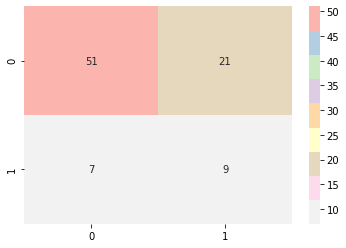

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r",  annot=True)

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(12), activation="relu", max_iter=10000000000)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(X_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(X_test, y_test)))

The Training accuracy of the model is 0.36
The Testing accuracy of the model is 0.34


In [ ]:
predictions = nnc.predict(X_test)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[ 0  0]
 [58 30]]


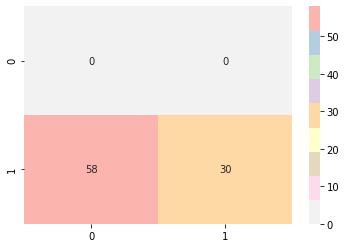

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", annot=True)

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0, tol=1e-5)
svc.fit(X_train, y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Performance of the KNN model when no dimensions are reduced
print("Training accuracy is {:.2f}".format(knn.score(X_train, y_train)) )
print("Testing accuracy is {:.2f} ".format(knn.score(X_test, y_test)) )

Training accuracy is 0.74
Testing accuracy is 0.64 


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=7)

In [ ]:
principal_components= pca.fit_transform(heart)
print(principal_components)

[[ 2.75324840e+03 -3.50794635e+00 -1.25813565e+02 ... -1.78537933e+01
  -1.93738944e+00  2.02882717e-01]
 [ 1.11337763e+03  7.27596698e+03 -1.20383654e+02 ...  5.01809960e+00
   2.23092434e+00 -4.56258760e-01]
 [-1.00246873e+05 -4.09802151e+02 -1.21598814e+02 ... -8.57536949e+00
   5.58682357e+00 -6.44052361e-01]
 ...
 [ 7.75360815e+03  1.23295354e+03  1.42217392e+02 ... -4.56811960e-01
   9.63409693e-01  1.09529350e-01]
 [ 4.79753658e+05  1.33685357e+03  1.44884857e+02 ...  1.41186191e+01
   1.95626021e+00  2.83489364e-02]
 [-1.22246215e+05  1.86344372e+03  1.53128923e+02 ...  8.96098593e+00
  -2.16802075e+00  4.89527023e-01]]


In [ ]:
principal_components.shape

(292, 7)

In [ ]:
pca.explained_variance_ratio_

array([9.99895079e-01, 1.04237083e-04, 6.52513037e-07, 1.59286877e-08,
       1.36671300e-08, 2.01413803e-09, 1.11865004e-10])

In [ ]:
sum(pca.explained_variance_ratio_)

0.9999999998638263

In [ ]:
heart.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'target'],
      dtype='object')

In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=["a", "b", "c", "d", "e", "f", "g"])
#principal_df.head()
main_df=pd.concat([principal_df, heart[["high_blood_pressure"]]], axis=1)

In [ ]:
main_df

,a,b,c,d,e,f,g,high_blood_pressure
0,2753.248396,-3.507925,-125.815097,8.613327,-17.852657,-1.937293,0.208400,1
1,1113.377628,7275.966996,-120.384459,-2.959855,5.016133,2.232246,-0.438753,0
2,-100246.872929,-409.802131,-121.600291,14.544716,-8.572810,5.587307,-0.635340,0
3,-52246.884890,-458.625277,-121.569608,22.747496,3.685375,-2.159595,0.556297,0
4,64753.124209,-443.380805,-122.376050,16.027513,-11.234562,18.790814,0.276275,0
...,...,...,...,...,...,...,...,...
294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


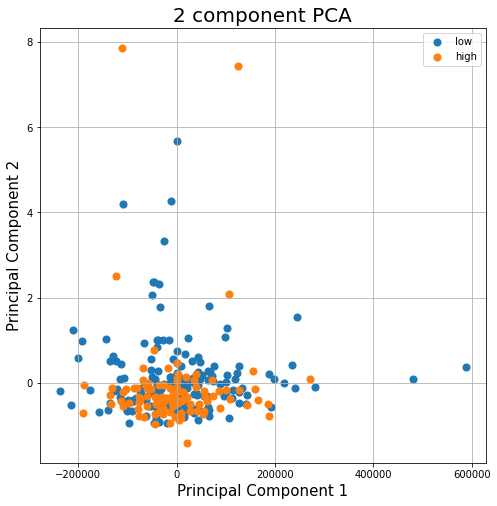

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1, 1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['#1f77b4', '#ff7f0e', '#17becf']
for target, color in zip(targets,colors):
    indicesToKeep = main_df['high_blood_pressure'] == target
    #print(indicesToKeep)
    ax.scatter(main_df.loc[indicesToKeep, 'a']
               , main_df.loc[indicesToKeep, 'g']
               , c = color
               , s = 50)
ax.legend(["low", "high"])
ax.grid()

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   a                    292 non-null    float64
 1   b                    292 non-null    float64
 2   c                    292 non-null    float64
 3   d                    292 non-null    float64
 4   e                    292 non-null    float64
 5   f                    292 non-null    float64
 6   g                    292 non-null    float64
 7   high_blood_pressure  299 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 18.8 KB


In [ ]:
print(main_df.isnull().sum())

a                      7
b                      7
c                      7
d                      7
e                      7
f                      7
g                      7
high_blood_pressure    0
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(main_df[['high_blood_pressure']])

impute.fit(main_df[['a']])
impute.fit(main_df[['b']])
impute.fit(main_df[['c']])
impute.fit(main_df[['d']])
impute.fit(main_df[['e']])
impute.fit(main_df[['f']])
impute.fit(main_df[['g']])

main_df['high_blood_pressure'] = impute.transform(main_df[['high_blood_pressure']])
main_df['a'] = impute.transform(main_df[['a']])
main_df['b'] = impute.transform(main_df[['b']])
main_df['c'] = impute.transform(main_df[['c']])
main_df['d'] = impute.transform(main_df[['d']])
main_df['e'] = impute.transform(main_df[['e']])
main_df['f'] = impute.transform(main_df[['f']])
main_df['g'] = impute.transform(main_df[['g']])


In [ ]:
print(main_df.isnull().sum())

a                      0
b                      0
c                      0
d                      0
e                      0
f                      0
g                      0
high_blood_pressure    0
dtype: int64


In [ ]:
z = heart.drop('high_blood_pressure', axis = 1)
m = heart['high_blood_pressure']

In [ ]:
z_train, z_test, m_train, m_test = train_test_split(z , m , test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_2=KNeighborsClassifier(n_neighbors=4)
knn_2.fit(z_train, m_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#Performance of the KNN model when the 30 dimensions are reduced to 2 pca
print("Training accuracy is {:.2f}".format(knn_2.score(z_train, m_train)) )
print("Testing accuracy is {:.2f} ".format(knn_2.score(z_test, m_test)) )

Training accuracy is 0.70
Testing accuracy is 0.73 


In [ ]:
print("Training set: z->{} , m->{} \n Testing set: z->{} , m->{}".format(z_train.shape, m_train.shape, z_test.shape, m_test.shape))

Training set: z->(233, 13) , m->(233,) 
 Testing set: z->(59, 13) , m->(59,)


In [ ]:
#Gaussian Naive Baiyes

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(z_train, m_train)

GaussianNB()

In [ ]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(z_train, m_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(z_test, m_test)))

Training accuracy of the model is 0.57
Testing accuracy of the model is 0.44


In [ ]:
predictions = gnb.predict(z_test)
print(predictions)

[1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, m_test)
print(mat)

[[16  8]
 [25 10]]


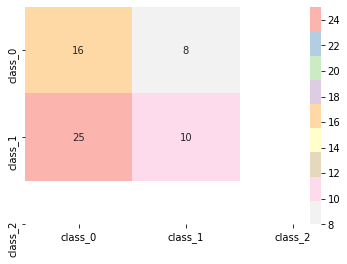

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(z_train, m_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(z_train, m_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(z_test, m_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.53


In [ ]:
predictions = rfc.predict(z_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, m_test)
print(mat)

[[27 14]
 [14  4]]


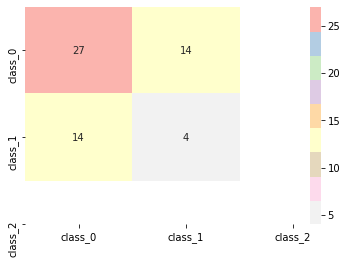

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000000000)

In [ ]:
nnc.fit(z_train, m_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000000000)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(z_train, m_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(z_test, m_test)))

The Training accuracy of the model is 0.42
The Testing accuracy of the model is 0.32


In [ ]:
predictions = nnc.predict(z_test)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, m_test)
print(mat)

[[ 3  2]
 [38 16]]


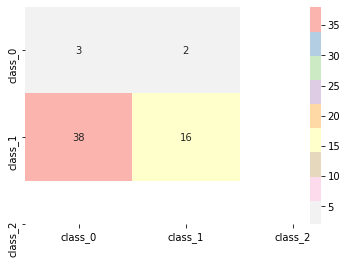

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=0, tol=1e-5)
svc.fit(z_train, m_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(z_train, m_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(z_test, m_test)))

Training accuracy of the model is 0.64
Testing accuracy of the model is 0.69


In [ ]:
predictions = svc.predict(z_test)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, m_test)
print(mat)

[[41 18]
 [ 0  0]]


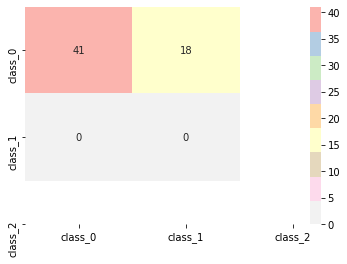

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(z_train, m_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(z_train, m_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(z_test, m_test)))

The Training accuracy of the model is 0.91
The Testing accuracy of the model is 0.80
